In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.1 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
!pip install yfinance 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import seaborn as sns
import math


# Scaling libraries
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, MaxAbsScaler, RobustScaler
from sklearn.preprocessing import QuantileTransformer, Binarizer

# Machine learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostRegressor, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# evaluation libraries
import sklearn.metrics as metrics


import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.svm import SVR 

In [ ]:
import yfinance as yf
yf.pdr_override()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
ticker = ""

In [ ]:
# Input details to check

# Input Start Date
def start_date():
    date_entry = input('Enter a starting date in MM/DD/YYYY format: ')
    start = dt.datetime.strptime(date_entry,'%m/%d/%Y')
    start = start.strftime('%Y-%m-%d')
    return start

# Input End Date
def end_date():
    date_entry = input('Enter a ending date in MM/DD/YYYY format: ')
    end = dt.datetime.strptime(date_entry,'%m/%d/%Y')
    end = end.strftime('%Y-%m-%d')
    return end

# Input Symbols
def input_symbol():
    symbol = input("Enter symbol: ").upper()
    return symbol

In [ ]:
def load_data():

    start = start_date()
    end = end_date()
    ticker = input_symbol()

    
    data = web.DataReader(ticker, 'yahoo', start, end)
    #data = yf.download(ticker, start, end)
    
    return data

In [ ]:
# training data 
traindata = load_data()

#show data
traindata

Enter a starting date in MM/DD/YYYY format: 01/01/2011
Enter a ending date in MM/DD/YYYY format: 01/01/2022
Enter symbol: amzn


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,9.300000,9.060500,9.068500,9.211000,106628000,9.211000
2011-01-04,9.385000,9.189000,9.307500,9.250500,100636000,9.250500
2011-01-05,9.372500,9.203500,9.205000,9.371000,68376000,9.371000
2011-01-06,9.370500,9.262500,9.325000,9.293000,63594000,9.293000
2011-01-07,9.422500,9.187000,9.394000,9.274500,104434000,9.274500
...,...,...,...,...,...,...
2021-12-27,172.942993,169.215500,171.037003,169.669495,58688000,169.669495
2021-12-28,172.175995,169.135498,170.182495,170.660995,54638000,170.660995
2021-12-29,171.212006,168.600494,170.839996,169.201004,35754000,169.201004


In [ ]:
traindata.shape

(2769, 6)

In [ ]:
# Dataset description
print(traindata.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2769 entries, 2011-01-03 to 2021-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2769 non-null   float64
 1   Low        2769 non-null   float64
 2   Open       2769 non-null   float64
 3   Close      2769 non-null   float64
 4   Volume     2769 non-null   int64  
 5   Adj Close  2769 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 151.4 KB
None


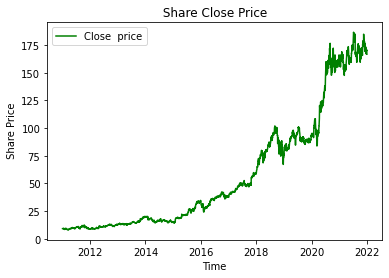

In [ ]:
# viaualise "Close" attribute
closeplot = traindata['Close'].copy()

plt.plot(closeplot, color="green", label=f"Close {ticker} price")
plt.title(f"{ticker} Share Close Price ")
plt.xlabel('Time')
plt.ylabel(f'{ticker} Share Price')
plt.legend()
plt.show()

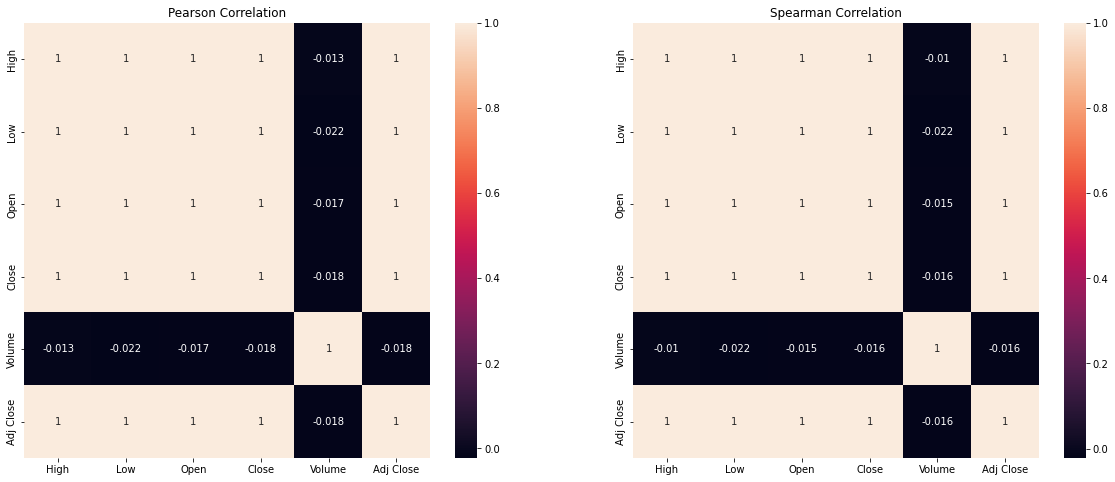

In [ ]:
# Visualising the data with Pearson's and Spearman's Correlation Coefficent
# this was done to find columns (independent variables) in the dataset which 
# affect the expenditure (dependent variable)
plt.figure(figsize=(20, 8)) 
plt.subplot(1, 2, 1)
corr = traindata.corr(method = 'pearson')
sns.heatmap(corr, annot = True)
plt.title("Pearson Correlation")

plt.subplot(1, 2, 2)
corr = traindata.corr(method = 'spearman')
sns.heatmap(corr, annot = True)
plt.title("Spearman Correlation")
plt.show()

In [ ]:
# create new dataframs with close column
data = traindata.filter(['Close'])

#convert dataframe to numpy array
dataset = data.values

# get the number of roes to train models on 
training_data_len = math.ceil(len(dataset) * .8) #80%

training_data_len

2216

# SCALING

In [ ]:
# min max
def minMax_dataset(dataset):
    # create scaler to scale down all the values to fit between 0 and 1
    scalar = MinMaxScaler(feature_range=(0,1))
    scaled_data = scalar.fit_transform(dataset)
    
    return scaled_data

# Binarize Data
def binarize_dataset(dataset):
  # Binarize values equal or less than 0 are marked 0 and all of those above 0 are marked 1
    binarizer = Binarizer(threshold = 0.0)#.fit(X)
    binarized_data = binarizer.fit_transform(dataset)

    return binarized_data

# Standardize Data
def standardize_dataset(dataset):
   # Standardize values with a mean of 0 and a standard deviation of 1
     scaler = StandardScaler()#.fit(X)
     scaled_data = scaler.fit_transform(dataset)

     return scaled_data

# Normalize Data
def normalize_dataset(dataset):
  # Normalize values with a mean of 0 and a standard deviation of 1'
    scaler = Normalizer()#.fit(X)
    scaled_data = scaler.fit_transform(dataset)

    return scaled_data

# Quantile scale Data  
def quantileScale_dataset(dataset):
  # This method transforms the features to follow a uniform or a normal distribution. 
  # Therefore, for a given feature, this transformation tends to spread out the most frequent values. 
  # It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.
    scaler = QuantileTransformer(n_quantiles=10, random_state=0)#.fit(X)
    scaled_data = scaler.fit_transform(dataset)

    return scaled_data
  
# MaxAbsScaler
def maxAbsScale_data(dataset):
  # Scale each feature by its maximum absolute value.
    scaler = MaxAbsScaler()
    scaled_data = scaler.fit_transform(dataset)

    return scaled_data

# RobustScaler
def robustScale_data(dataset):
  # This Scaler removes the median and scales the data according to the quantile range
    scaler = RobustScaler()
    scaled_data = scaler.fit_transform(dataset)

    return scaled_data


# Split Train, Split Test and Reshape

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# create training dataset 
# create scaled training dataset 

def split_train_dataset(scaled_dataset):
    
    train_data = scaled_dataset[0:training_data_len, :]
    
    #split data into x_train and y_train datasets 
    x_train = [] #independent variable 
    y_train = [] # dependent variable /target variable "Close"
    
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
        
        #if i<=60:
            #print("X_train")
            #print(x_train)
            #print()
            #print("Y_train")
            #print(y_train)
            #print()
    
    # convert x_train and y_train to numpy arrays for training models 
    x_train, y_train = np.array(x_train), np.array(y_train)
    return x_train, y_train

In [ ]:
# reshape train data for LSTM (LSTM expects data to be threee dimentional)
# num samples number of timesteps and num of features 
def reshape_train(scaled_dataset):

    x_train, y_train = split_train_dataset(scaled_dataset)
    
    # reshape the data
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

    #x_train.shape
    
    return x_train, y_train

In [ ]:
# reshape test data for 2 dimensional
def reshape_train_2d(scaled_dataset):
    x_train, y_train = split_train_dataset(scaled_dataset)
    
    # reshape the data 
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1]))
    
    return x_train, y_train

In [ ]:
x_train, y_train = reshape_train_2d(minMax_dataset(dataset))
x_train.shape

(2156, 60)

In [ ]:
x_train, y_train = reshape_train(robustScale_data(dataset))

x_train.shape

(2156, 60, 1)

In [ ]:
# Create testing dataset
def split_test_dataset(scaled_data):
    test_data = scaled_data[training_data_len - 60:, :]
    
    #print(test_data)
    
    # create x_test and y_test 
    x_test = []
    y_test = dataset[training_data_len:, :] # values for model to predict
    
    for i in range(60, len(test_data)):
        
        x_test.append(test_data[i-60:i, 0])
        
    x_test = np.array(x_test) # convert to numpy array to use in lstm
        
        
    return x_test, y_test

In [ ]:
# reshape test data for lstm 3 dimensional
def reshape_test(scaled_dataset):
    x_test, y_test = split_test_dataset(scaled_dataset)
    
    # reshape the data 
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
    
    return x_test, y_test


In [ ]:
# reshape test data for 2 dimensional
def reshape_test_2d(scaled_dataset):
    x_test, y_test = split_test_dataset(scaled_dataset)
    
    # reshape the data 
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1]))
    
    return x_test, y_test



In [ ]:
def split(data):
    df = data

    # training and testing
    c=df.drop('Close',axis=1) 
    d=df['Close'] 
    x_train, x_test, y_train, y_test = train_test_split(c,d,test_size=0.30)

    return x_train, y_train, x_test, y_test



In [ ]:
x_test, y_test = reshape_test_2d(minMax_dataset(dataset))
x_test.shape



(553, 60)

In [ ]:
x_test, y_test = reshape_test(minMax_dataset(dataset))
x_test.shape

(553, 60, 1)

# Machine learning Models

In [ ]:
# Lstm Model

def lstm(scaled_data):
    x_train, y_train = reshape_train(scaled_data)
    x_test, y_test = reshape_test(scaled_data)
    
    # Build the Model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1)) # prediction of the next closing price

    # investigate loss functions and optimisers 
    model.compile(optimizer='adam', loss='mean_squared_error')
    # train model
    # feed the model 25 epochs and model will see 32 units of the batch size every time
    model.fit(x_train, y_train, epochs=25, batch_size=32)
    
    # get models predicted price values
    predicted_prices = model.predict(x_test)
    # reverse scaling / inverse transform  to get actual values 
    scalar = MinMaxScaler(feature_range=(0,1)) # replace this with a conditional statement
    scalar.fit_transform(dataset)
    # create inverse transform function
    predicted_prices = scalar.inverse_transform(predicted_prices)
    
    # evaluate model
    # ger the root mean squared error (RMSE)
    # good measure of how well the model predicts the response, standard deviation of residuals, lower values indicate better fit
    rmse = np.sqrt(np.mean(predicted_prices - y_test)**2)
    print ('root mean squared error (RMSE) for Model')
    print(rmse)

    # plot data
    # plot test prediction
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = predicted_prices
    # visualise data
    plt.figure(figsize=(16,8))
    plt.title('LSTM Model')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD($)', fontsize=18)
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()
    
    return model

Epoch 1/25
68/68 [==============================] - 14s 106ms/step - loss: 0.0038
Epoch 2/25
68/68 [==============================] - 6s 92ms/step - loss: 7.0599e-04
Epoch 3/25
68/68 [==============================] - 6s 91ms/step - loss: 6.4060e-04
Epoch 4/25
68/68 [==============================] - 6s 88ms/step - loss: 6.8791e-04
Epoch 5/25
68/68 [==============================] - 6s 92ms/step - loss: 6.6133e-04
Epoch 6/25
68/68 [==============================] - 6s 93ms/step - loss: 5.7730e-04
Epoch 7/25
68/68 [==============================] - 6s 92ms/step - loss: 4.9248e-04
Epoch 8/25
68/68 [==============================] - 6s 93ms/step - loss: 5.1255e-04
Epoch 9/25
68/68 [==============================] - 6s 92ms/step - loss: 5.2148e-04
Epoch 10/25
68/68 [==============================] - 6s 88ms/step - loss: 5.0574e-04
Epoch 11/25
68/68 [==============================] - 6s 91ms/step - loss: 4.8304e-04
Epoch 12/25
68/68 [==============================] - 7s 96ms/step - loss: 4.

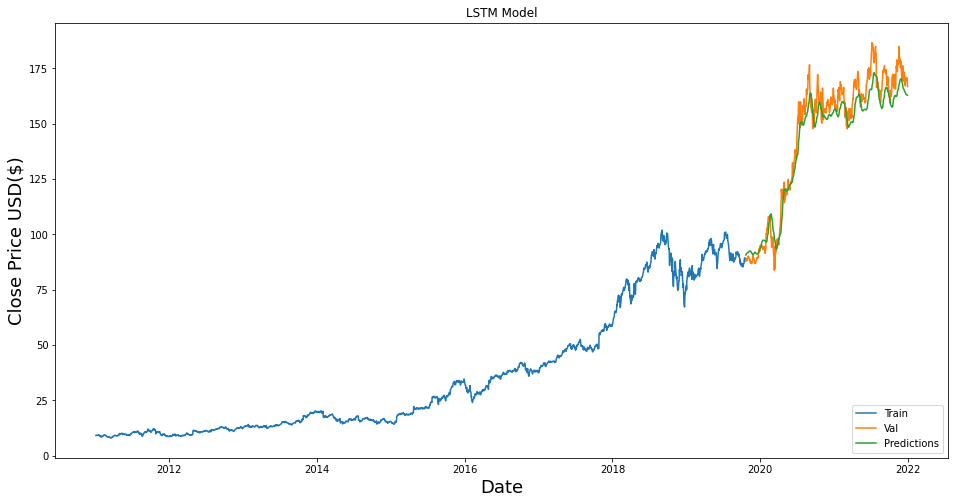

In [ ]:
lstm(minMax_dataset(dataset))

Epoch 1/25
68/68 [==============================] - 16s 134ms/step - loss: 0.0636
Epoch 2/25
68/68 [==============================] - 6s 95ms/step - loss: 0.0087
Epoch 3/25
68/68 [==============================] - 7s 97ms/step - loss: 0.0080
Epoch 4/25
68/68 [==============================] - 8s 115ms/step - loss: 0.0071
Epoch 5/25
68/68 [==============================] - 7s 97ms/step - loss: 0.0063
Epoch 6/25
68/68 [==============================] - 7s 96ms/step - loss: 0.0072
Epoch 7/25
68/68 [==============================] - 6s 94ms/step - loss: 0.0062
Epoch 8/25
68/68 [==============================] - 6s 94ms/step - loss: 0.0058
Epoch 9/25
68/68 [==============================] - 6s 94ms/step - loss: 0.0056
Epoch 10/25
68/68 [==============================] - 6s 94ms/step - loss: 0.0052
Epoch 11/25
68/68 [==============================] - 6s 94ms/step - loss: 0.0052
Epoch 12/25
68/68 [==============================] - 7s 97ms/step - loss: 0.0054
Epoch 13/25
68/68 [===============

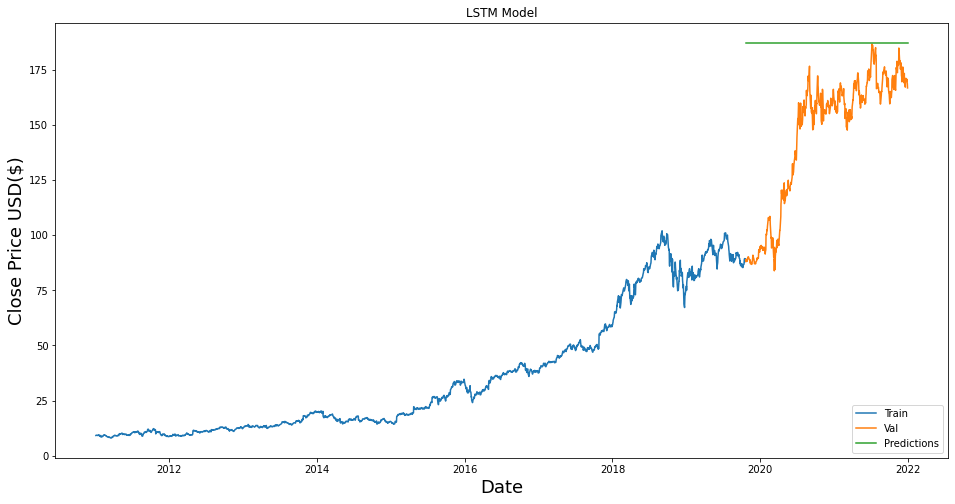

In [ ]:

binarize_dataset(dataset)

# Standardize Data
 standardize_dataset(dataset):
  

# Normalize Data
normalize_dataset(dataset):
  # Normalize values with a mean of 0 and a standard deviation of 1'
    scaler = Normalizer()#.fit(X)
    scaled_data = scaler.fit_transform(dataset)

    return scaled_data

# Quantile scale Data  
def quantileScale_dataset(dataset):
  # This method transforms the features to follow a uniform or a normal distribution. 
  # Therefore, for a given feature, this transformation tends to spread out the most frequent values. 
  # It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.
    scaler = QuantileTransformer(n_quantiles=10, random_state=0)#.fit(X)
    scaled_data = scaler.fit_transform(dataset)

    return scaled_data
  
# MaxAbsScaler
def maxAbsScale_data(dataset):
  # Scale each feature by its maximum absolute value.
    scaler = MaxAbsScaler()
    scaled_data = scaler.fit_transform(dataset)

    return scaled_data

# RobustScaler
def robustScale_data(dataset):

In [ ]:
#Logistic Regression (LR), Linear Discriminant Analysis (LDA),
# K-Nearest Neighbors (KNN), Classification and Regression Trees (CART),
# Naïve Bayes (NB), Support Vector Machine (SVM), XGBoost Algorithm (XGB),
# Decision Tree Classifier (DT), Random Forest Classifier (RF), Gradient Boost (GB), 
# AdaBoost (AB), and Extra Tree classifier (ET

In [ ]:
# Logistic Regression
def stock_logistic_regression():
    #s = start_date() 
    #e = end_date()
    #sym = input_symbol()
    #df = yf.download(sym, s, e)
    df = traindata
 
   # df = df.drop(['Date'], axis=1)
    X = df.loc[:, df.columns != 'Close']
    y = np.where (df['Close'].shift(-1) > df['Close'],1,-1)

    split = int(0.7*len(df))
    X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
    model = LogisticRegression()
    model = model.fit(X_train,y_train)
    predicted = model.predict(X_test)
    print(metrics.confusion_matrix(y_test, predicted))
    print(metrics.classification_report(y_test, predicted))
    print(model.score(X_test,y_test))
    cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
    print(cross_val)
    print(cross_val.mean())

    rmse = np.sqrt(np.mean(predicted - y_test)**2)
    print ('root mean squared error (RMSE) for Model')
    print(rmse)

    print('____________Summary:____________')      
    print('Accuracy Score:', model.score(X_test,y_test))
    print ('root mean squared error (RMSE) for Model: ', rmse)
    print("")

    return

In [ ]:
stock_logistic_regression()

[[  0 393]
 [  0 438]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       393
           1       0.53      1.00      0.69       438

    accuracy                           0.53       831
   macro avg       0.26      0.50      0.35       831
weighted avg       0.28      0.53      0.36       831

0.5270758122743683
[0.53429603 0.53429603 0.53429603 0.53429603 0.53429603 0.53429603
 0.53068592 0.53068592 0.53068592 0.5326087 ]
0.5330442630670225
root mean squared error (RMSE) for Model
0.9458483754512635
____________Summary:____________
Accuracy Score: 0.5270758122743683
root mean squared error (RMSE) for Model:  0.9458483754512635



In [ ]:
# Linear Regression
def stock_linear_regression():
   
    df = traindata
    n = len(df.index)
    X = np.array(df['Open']).reshape(n,-1)
    Y = np.array(df['Adj Close']).reshape(n,-1)
    
    X = minMax_dataset(X)
    lr = LinearRegression()
    lr.fit(X, Y)
    predicted = lr.predict(X)
    
    #plt.figure(figsize=(12,8))
    #plt.scatter(df['Adj Close'], lr.predict(X))
    #plt.plot(X, lr.predict(X), color = 'red')
    #plt.xlabel('Prices')
    #plt.ylabel('Predicted Prices')
    #plt.grid()
    #plt.title(' Prices vs Predicted Prices')
    #plt.show()
    print('____________Summary:____________')      
    print('Estimate intercept coefficient:', lr.intercept_)
    print('Number of coefficients:', len(lr.coef_))
    print('Accuracy Score:', lr.score(X, Y))
    print("")
  
    return

In [ ]:
stock_linear_regression()

____________Summary:____________
Estimate intercept coefficient: [8.09031703]
Number of coefficients: 1
Accuracy Score: 0.9994903171079828



In [ ]:
# Decision tree
def decision_tree():

    df = traindata
 
   # df = df.drop(['Date'], axis=1)
    X = df.loc[:, df.columns != 'Close']
    y = np.where (df['Close'].shift(-1) > df['Close'],1,-1)

    split = int(0.7*len(df))
    X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
    model = DecisionTreeRegressor()
    model = model.fit(X_train,y_train)
    predicted = model.predict(X_test)
    print(metrics.confusion_matrix(y_test, predicted))
    print(metrics.classification_report(y_test, predicted))
    print(model.score(X_test,y_test))
    cross_val = cross_val_score(DecisionTreeRegressor(), X, y, scoring='accuracy', cv=10)
    print(cross_val)
    print(cross_val.mean())

    rmse = np.sqrt(np.mean(predicted - y_test)**2)
    print ('root mean squared error (RMSE) for Model')
    print(rmse)

    print('____________Summary:____________')      
    print('Accuracy Score:', model.score(X_test,y_test))
    print ('root mean squared error (RMSE) for Model: ', rmse)
    print("")

    return


In [ ]:
decision_tree()

[[226 167]
 [267 171]]
              precision    recall  f1-score   support

          -1       0.46      0.58      0.51       393
           1       0.51      0.39      0.44       438

    accuracy                           0.48       831
   macro avg       0.48      0.48      0.48       831
weighted avg       0.48      0.48      0.47       831

-1.095193279654223
[0.50180505 0.49097473 0.46209386 0.50180505 0.44765343 0.55234657
 0.44043321 0.50902527 0.5234657  0.47826087]
0.490786375765186
root mean squared error (RMSE) for Model
0.24067388688327315
____________Summary:____________
Accuracy Score: -1.095193279654223
root mean squared error (RMSE) for Model:  0.24067388688327315



In [ ]:
# Support Vector Regression
def stock_svr():
   
    df = traindata
    dates = np.reshape(df.index,(len(df.index), 1)) # convert to 1xn dimension

    X = df.loc[:, df.columns != 'Close']
    y = np.where (df['Close'].shift(-1) > df['Close'],1,-1)

    X = np.reshape(X,(len(X), 1))
    prices = df['Close']
    svr_lin  = SVR(kernel='linear', C=1e3)
    svr_poly = SVR(kernel='poly', C=1e3, degree=2)
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    
    # Fit regression model
    svr_lin .fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    plt.figure(figsize=(12,8))
    plt.scatter(dates, prices, c='k', label='Data')
    plt.plot(dates, svr_lin.predict(dates), c='g', label='Linear model')
    plt.plot(dates, svr_rbf.predict(dates), c='r', label='RBF model')    
    plt.plot(dates, svr_poly.predict(dates), c='b', label='Polynomial model')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    print('____________Summary:____________')   
    print('Linear Model:', svr_rbf.predict(x)[0])
    print('RBF Model:', svr_lin.predict(x)[0])
    print('Polynomial Model:', svr_poly.predict(x)[0])
    print("")
    return

In [ ]:
stock_svr()

ValueError: ignored